<a href="https://colab.research.google.com/github/Aravinda89/Image-Classificatio-from-Scratch/blob/main/CH_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastai 

In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import pandas as pd
import os
import random

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
IMAGE_PATH = 'gdrive/MyDrive/DataSets/CH_mnist/data'

In [5]:
path = Path(IMAGE_PATH)
Path.BASE_PATH = path

In [6]:
len(path.ls())

15000

In [7]:
path.ls()[:5]

(#5) [Path('input_84_5_4.jpg'),Path('input_97_5_3.jpg'),Path('input_94_7_14.jpg'),Path('input_84_6_11.jpg'),Path('input_88_10_4.jpg')]

In [8]:
file_list = path.ls()

gdrive/MyDrive/DataSets/CH_mnist/data/input_93_4_3.jpg


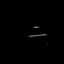

In [9]:
img_file = random.choice(file_list)
print(img_file)
im = Image.open(img_file)
im

In [10]:
im.size

(64, 64)

In [11]:
ls gdrive/MyDrive/DataSets/CH_mnist/

chinese_mnist.csv  data/


In [12]:
df = pd.read_csv("gdrive/MyDrive/DataSets/CH_mnist/chinese_mnist.csv")
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [13]:
df['img_name'] = 'input_'+ df['suite_id'].astype(str) + '_' + df['sample_id'].astype(str) + '_' +  df['code'].astype(str)+'.jpg'

In [14]:
df

,suite_id,sample_id,code,value,character,img_name
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg
...,...,...,...,...,...,...
14995,99,5,9,8,八,input_99_5_9.jpg
14996,99,6,9,8,八,input_99_6_9.jpg
14997,99,7,9,8,八,input_99_7_9.jpg
14998,99,8,9,8,八,input_99_8_9.jpg


In [15]:
df['value'].astype(str).value_counts()

2            1000
9            1000
1000         1000
7            1000
1            1000
8            1000
0            1000
100000000    1000
3            1000
4            1000
6            1000
5            1000
10           1000
100          1000
10000        1000
Name: value, dtype: int64

In [16]:
path

Path('.')

In [17]:
def get_x(r): return path/r['img_name']

def get_y(r): return r['value'].astype(str).split(" ")
# def get_y(r): return r['value'].astype(str)

In [18]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter = RandomSplitter(valid_pct=0.2, seed=66),
                   get_x = get_x,
                   get_y = get_y,
                   batch_tfms= RandomResizedCrop(128,min_scale=0.35))

dls = dblock.dataloaders(df)

In [19]:
len(dls.train), len(dls.valid)

(187, 47)

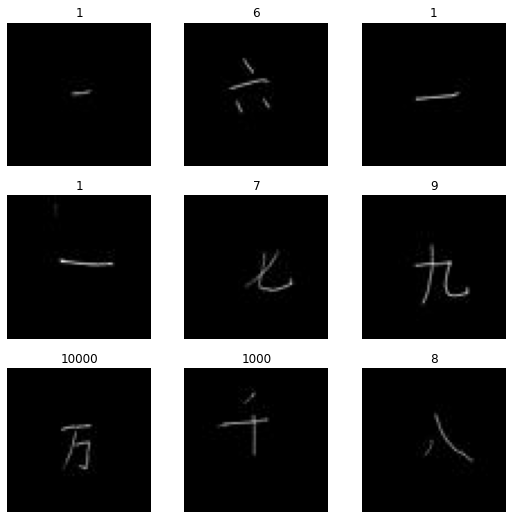

In [20]:
dls.show_batch()

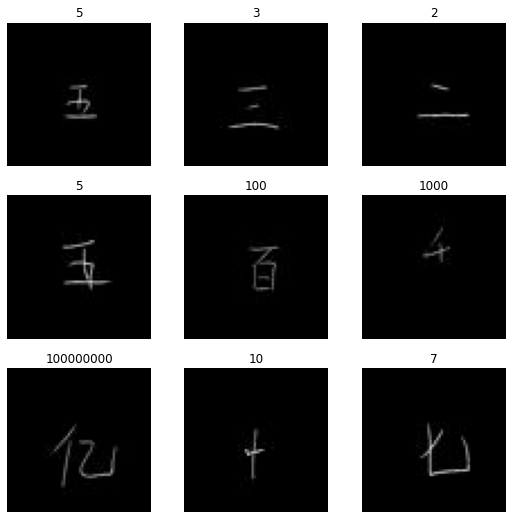

In [42]:
dls.train.show_batch()

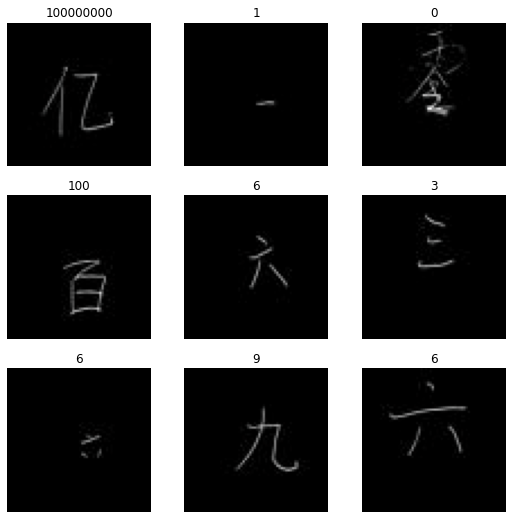

In [44]:
dls.valid.show_batch()

In [21]:
xb, yb = dls.one_batch()

In [22]:
xb.shape, yb.shape

(torch.Size([64, 3, 64, 64]), torch.Size([64, 15]))

In [23]:
yb

TensorMultiCategory([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       

In [24]:
dls.train_ds

(#12000) [(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 1., 0.

In [25]:
dls.valid_ds

(#3000) [(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0.,

In [26]:
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, sigmoid=False))

In [27]:
learn.summary()

Sequential (Input shape: 64 x 3 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 32 x 32   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 16 x 16   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                        

SuggestedLRs(valley=0.004365158267319202)

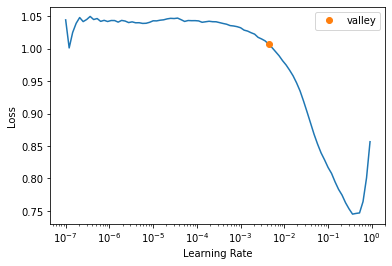

In [28]:
learn.lr_find()

In [29]:
learn.fit_one_cycle(5, lr_max=0.004365158267319202, 
                    cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=2),
                        ReduceLROnPlateau(monitor='valid_loss', patience=2)])

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.278612,0.076911,0.969000,01:15
1,0.041336,0.039381,0.986822,01:00
2,0.019887,0.012035,0.995956,01:01
3,0.010695,0.006521,0.997756,01:01
4,0.007835,0.005842,0.998200,01:01


SuggestedLRs(valley=1.2022644114040304e-05)

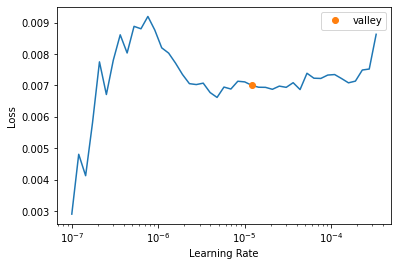

In [30]:
learn.unfreeze()

learn.lr_find()

In [31]:
learn.fit_one_cycle(15, lr_max=1.2022644114040304e-05, 
                    cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=2),
                        ReduceLROnPlateau(monitor='valid_loss', patience=2)])

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.006314,0.005446,0.998178,01:04
1,0.006287,0.005526,0.998156,01:04
2,0.004949,0.005234,0.998222,01:03
3,0.004399,0.004504,0.998733,01:02
4,0.002866,0.004304,0.998600,01:02
5,0.002144,0.003899,0.998622,01:02
6,0.002445,0.003461,0.998911,01:02
7,0.001716,0.003344,0.998978,01:02
8,0.001370,0.003531,0.998911,01:02
9,0.001449,0.003433,0.999000,01:06


Epoch 9: reducing lr to 4.976379784255267e-07
No improvement since epoch 7: early stopping


In [32]:
# learn.export('/content/gdrive/MyDrive/models/CH_MNIST.pkl')

In [73]:
# learn.recorder.plot_loss()

In [74]:
# learn.fine_tune(epochs=3, cbs=[ShowGraphCallback()]

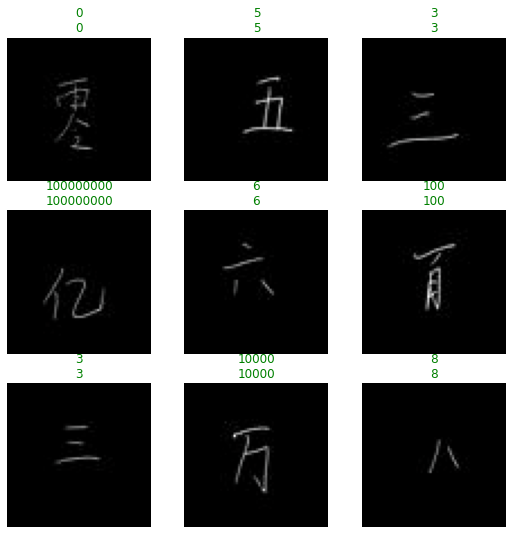

In [57]:
learn.show_results()

In [47]:


def plot_top_losses_fix(interp, k, largest=True, **kwargs):
        losses,idx = interp.top_losses(k, largest)
        if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
        if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
        else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
        b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
        x,y,its = interp.dl._pre_show_batch(b, max_n=k)
        b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
        x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
        if its is not None:
            #plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), L(self.preds).itemgot(idx), losses,  **kwargs)
            plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses,  **kwargs)
        #TODO: figure out if this is needed
        #its None means that a batch knows how to show itself as a whole, so we pass x, x1
        #else: show_results(x, x1, its, ctxs=ctxs, max_n=max_n, **kwargs)



,target,predicted,probabilities,loss
0,10000,100000000,"TensorBase([1.3763e-06, 1.1063e-06, 1.0592e-06, 1.9327e-06, 1.5715e-06, 1.3651e-06,\n 1.0000e+00, 1.1358e-05, 6.0713e-05, 1.7308e-07, 3.0522e-06, 4.3446e-07,\n 1.4828e-05, 8.5330e-06, 1.6108e-06])",1.746195673942566
1,1000,1,"TensorBase([5.8708e-05, 9.4865e-01, 1.8883e-01, 4.7023e-05, 1.0016e-04, 2.0094e-04,\n 1.4043e-05, 7.5712e-06, 7.7776e-05, 5.2408e-04, 6.7829e-05, 1.4055e-04,\n 4.6876e-04, 5.1046e-04, 1.6256e-05])",0.8259453177452087
2,3,2,"TensorBase([2.6612e-05, 2.4496e-05, 5.3378e-05, 4.3366e-05, 2.1544e-05, 2.9815e-05,\n 1.5753e-04, 9.9696e-01, 1.6488e-03, 3.2990e-05, 2.0641e-05, 1.8843e-04,\n 4.7563e-05, 3.6562e-05, 1.2963e-04])",0.813678503036499
3,2,1,"TensorBase([3.6498e-05, 9.7425e-01, 2.1531e-04, 1.2248e-04, 3.0579e-05, 3.9353e-05,\n 1.1481e-04, 2.8742e-02, 1.1485e-03, 7.9608e-05, 2.3149e-04, 2.2937e-04,\n 1.2558e-04, 4.7844e-05, 2.4574e-04])",0.4807508587837219
4,2,1,"TensorBase([9.7797e-05, 9.4259e-01, 5.1119e-04, 4.4550e-04, 2.8360e-04, 2.6585e-04,\n 4.6239e-04, 5.1326e-02, 2.8067e-03, 6.8777e-05, 4.2897e-04, 1.3199e-03,\n 5.9216e-04, 4.9109e-05, 3.0065e-04])",0.3889875113964081
5,100000000,,"TensorBase([2.1961e-05, 1.6471e-05, 4.0138e-05, 3.9485e-04, 3.5152e-05, 1.3597e-01,\n 4.8484e-03, 1.7163e-05, 6.8031e-05, 2.5361e-05, 5.7487e-05, 1.2186e-01,\n 4.3700e-05, 1.4800e-05, 8.5650e-03])",0.3743027448654175
6,3,2,"TensorBase([2.2530e-05, 6.7560e-06, 9.9593e-05, 2.8293e-05, 7.9746e-05, 2.6235e-05,\n 1.6005e-04, 8.7118e-01, 6.4027e-02, 8.3034e-05, 4.1806e-05, 1.3939e-03,\n 9.3638e-05, 4.1982e-05, 4.0647e-04])",0.3200204372406006
7,9,8,"TensorBase([4.8231e-05, 4.5514e-05, 4.2104e-04, 4.6250e-04, 1.0898e-04, 8.6409e-04,\n 3.5690e-02, 7.6193e-04, 2.4990e-03, 1.4532e-04, 2.1341e-03, 4.2709e-05,\n 2.1117e-03, 6.0254e-01, 2.3331e-02])",0.3151071071624756
8,9,6,"TensorBase([7.4244e-05, 5.8816e-06, 1.3806e-04, 8.4464e-05, 1.7264e-04, 8.5793e-05,\n 1.1202e-03, 2.3051e-04, 9.0873e-05, 2.8772e-05, 5.2364e-06, 7.9229e-01,\n 5.9231e-03, 3.2712e-05, 5.2471e-02])",0.3018074333667755
9,6,7,"TensorBase([4.1265e-04, 4.4106e-03, 1.0115e-03, 5.5640e-04, 6.8084e-04, 4.1201e-02,\n 8.7627e-05, 1.1816e-02, 4.4869e-04, 1.1933e-04, 3.5667e-04, 4.9917e-02,\n 6.9087e-01, 1.5781e-04, 2.8052e-04])",0.282259076833725


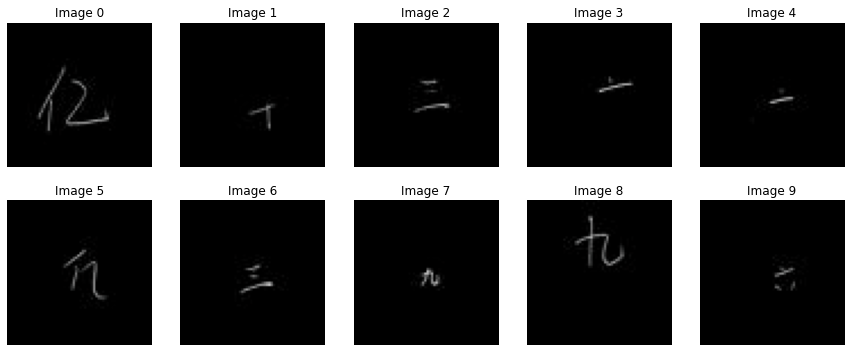

In [48]:
plot_top_losses_fix(interp, 10, nrows=2)

In [49]:
interp = ClassificationInterpretation.from_learner(learn)

,target,predicted,probabilities,loss
0,10000,100000000,"TensorBase([[1.3763e-06, 1.1063e-06, 1.0592e-06, 1.9327e-06, 1.5715e-06, 1.3651e-06,\n 1.0000e+00, 1.1358e-05, 6.0713e-05, 1.7308e-07, 3.0522e-06, 4.3446e-07,\n 1.4828e-05, 8.5330e-06, 1.6108e-06],\n [5.8708e-05, 9.4865e-01, 1.8883e-01, 4.7023e-05, 1.0016e-04, 2.0094e-04,\n 1.4043e-05, 7.5712e-06, 7.7776e-05, 5.2408e-04, 6.7829e-05, 1.4055e-04,\n 4.6876e-04, 5.1046e-04, 1.6256e-05],\n [2.6612e-05, 2.4496e-05, 5.3378e-05, 4.3366e-05, 2.1544e-05, 2.9815e-05,\n 1.5753e-04, 9.9696e-01, 1.6488e-03, 3.2990e-05, 2.0641e-05, 1.8843e-04,\n 4.7563e-05, 3.6562e-05, 1.2963e-04],\n [3.6498e-05, 9.7425e-01, 2.1531e-04, 1.2248e-04, 3.0579e-05, 3.9353e-05,\n 1.1481e-04, 2.8742e-02, 1.1485e-03, 7.9608e-05, 2.3149e-04, 2.2937e-04,\n 1.2558e-04, 4.7844e-05, 2.4574e-04],\n [9.7797e-05, 9.4259e-01, 5.1119e-04, 4.4550e-04, 2.8360e-04, 2.6585e-04,\n 4.6239e-04, 5.1326e-02, 2.8067e-03, 6.8777e-05, 4.2897e-04, 1.3199e-03,\n 5.9216e-04, 4.9109e-05, 3.0065e-04],\n [2.1961e-05, 1.6471e-05, 4.0138e-05, 3.9485e-04, 3.5152e-05, 1.3597e-01,\n 4.8484e-03, 1.7163e-05, 6.8031e-05, 2.5361e-05, 5.7487e-05, 1.2186e-01,\n 4.3700e-05, 1.4800e-05, 8.5650e-03],\n [2.2530e-05, 6.7560e-06, 9.9593e-05, 2.8293e-05, 7.9746e-05, 2.6235e-05,\n 1.6005e-04, 8.7118e-01, 6.4027e-02, 8.3034e-05, 4.1806e-05, 1.3939e-03,\n 9.3638e-05, 4.1982e-05, 4.0647e-04],\n [4.8231e-05, 4.5514e-05, 4.2104e-04, 4.6250e-04, 1.0898e-04, 8.6409e-04,\n 3.5690e-02, 7.6193e-04, 2.4990e-03, 1.4532e-04, 2.1341e-03, 4.2709e-05,\n 2.1117e-03, 6.0254e-01, 2.3331e-02],\n [7.4244e-05, 5.8816e-06, 1.3806e-04, 8.4464e-05, 1.7264e-04, 8.5793e-05,\n 1.1202e-03, 2.3051e-04, 9.0873e-05, 2.8772e-05, 5.2364e-06, 7.9229e-01,\n 5.9231e-03, 3.2712e-05, 5.2471e-02],\n [4.1265e-04, 4.4106e-03, 1.0115e-03, 5.5640e-04, 6.8084e-04, 4.1201e-02,\n 8.7627e-05, 1.1816e-02, 4.4869e-04, 1.1933e-04, 3.5667e-04, 4.9917e-02,\n 6.9087e-01, 1.5781e-04, 2.8052e-04]])",1.746195673942566


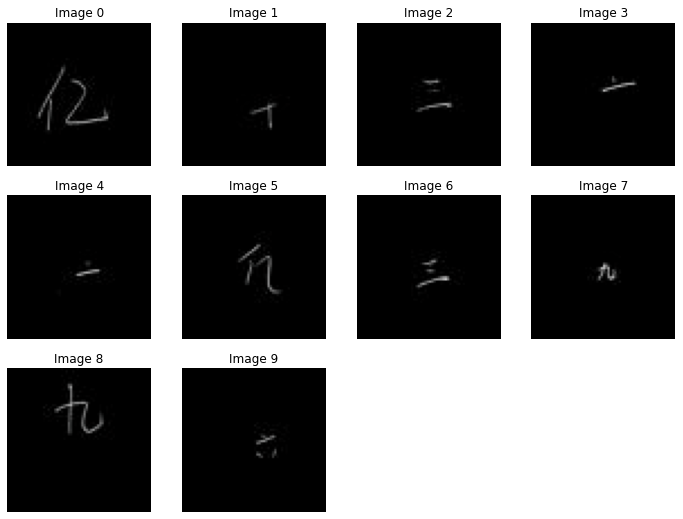

In [55]:
interp.plot_top_losses(k=10)